In [1]:
import warnings

# FutureWarning 경고 메시지를 무시하도록 설정
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

Q. diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']는 0값을 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압),
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'

In [42]:
import pandas as pd

file_path = r"D:\kdt_240424\workspace\M5_ML\data\diabetes.csv"

diabetes_data = pd.read_csv(file_path)

In [43]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [44]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [45]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
import pandas as pd
import numpy as np


# 대체할 컬럼 리스트
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# 각 컬럼에 대해 반복
for column in columns_to_replace:
    # 0이 아닌 값들의 평균 계산
    column_mean = diabetes_data[column][diabetes_data[column] != 0].mean()

    # 0값을 평균으로 대체
    diabetes_data[column] = diabetes_data[column].replace(0, column_mean)

print(diabetes_data.head())  # 결과 확인

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [47]:
# ex
# X = diabetes_data.iloc[:, :-1]
# y = diabetes_data.iloc[:, -1]

In [48]:
from sklearn.model_selection import train_test_split

y_diabetes_data = diabetes_data['Outcome']
X_diabetes_data = diabetes_data.drop('Outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_data, y_diabetes_data, test_size=0.3, random_state=42, stratify=y)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성


def get_clf_eval(y_test=None, pred=None, pred_proba=None):
    from sklearn.metrics import (
        accuracy_score,
        precision_score,
        recall_score,
        f1_score,
        roc_auc_score,
        confusion_matrix,
    )

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba, average=None, multi_class="ovr")
    print("오차 행렬")
    print(confusion)
    # ROC-AUC print 추가
    print(
        f"평가 함수 결과 :\n정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, ROC AUC : {roc_auc:.4f}"
    )

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)

model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[132  18]
 [ 38  43]]
평가 함수 결과 :
정확도 : 0.7576, 정밀도 : 0.7049, 재현율 : 0.5309, F1 : 0.6056, ROC AUC : 0.8254


[np.float64(0.0), np.float64(0.005), np.float64(0.01), np.float64(0.015), np.float64(0.02), np.float64(0.025), np.float64(0.03), np.float64(0.035), np.float64(0.04), np.float64(0.045), np.float64(0.05), np.float64(0.055), np.float64(0.06), np.float64(0.065), np.float64(0.07), np.float64(0.075), np.float64(0.08), np.float64(0.085), np.float64(0.09), np.float64(0.095), np.float64(0.1), np.float64(0.105), np.float64(0.11), np.float64(0.115), np.float64(0.12), np.float64(0.13), np.float64(0.135), np.float64(0.14), np.float64(0.145), np.float64(0.15), np.float64(0.16), np.float64(0.165), np.float64(0.17), np.float64(0.175), np.float64(0.18), np.float64(0.185), np.float64(0.19), np.float64(0.195), np.float64(0.205), np.float64(0.21), np.float64(0.22), np.float64(0.225), np.float64(0.23), np.float64(0.235), np.float64(0.24), np.float64(0.25), np.float64(0.255), np.float64(0.26), np.float64(0.265), np.float64(0.275), np.float64(0.28), np.float64(0.29), np.float64(0.3), np.float64(0.305), np.fl

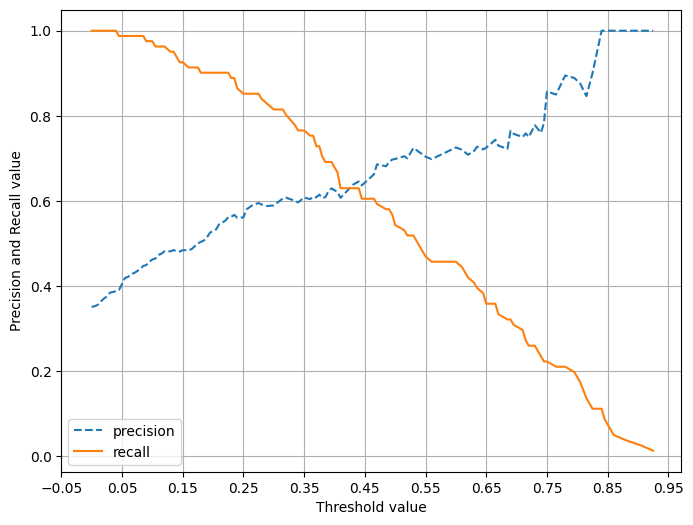

In [52]:
# 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    print(list(thresholds))
    print(thresholds.shape)
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    print(threshold_boundary)
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle="--", label="precision")
    plt.plot(thresholds, recalls[0:threshold_boundary], label="recall")

    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()  # x축 현재 한계를 반환
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, pred_proba)

In [12]:
print(pred_proba)
print(pred_proba.shape)

[0.44  0.23  0.095 0.195 0.485 0.535 0.01  0.685 0.66  0.615 0.28  0.86
 0.285 0.17  0.045 0.355 0.09  0.03  0.715 0.45  0.4   0.075 0.345 0.005
 0.6   0.93  0.09  0.06  0.23  0.14  0.73  0.69  0.81  0.855 0.545 0.725
 0.84  0.485 0.23  0.63  0.055 0.375 0.59  0.53  0.045 0.73  0.53  0.125
 0.18  0.85  0.015 0.795 0.66  0.3   0.09  0.035 0.68  0.07  0.21  0.865
 0.745 0.2   0.25  0.35  0.095 0.74  0.005 0.545 0.045 0.75  0.72  0.19
 0.145 0.04  0.16  0.415 0.26  0.115 0.21  0.2   0.885 0.12  0.135 0.64
 0.07  0.93  0.66  0.415 0.275 0.015 0.035 0.2   0.095 0.545 0.525 0.625
 0.61  0.01  0.71  0.085 0.725 0.015 0.535 0.62  0.82  0.295 0.34  0.865
 0.145 0.71  0.03  0.575 0.33  0.825 0.415 0.515 0.73  0.305 0.05  0.385
 0.01  0.13  0.47  0.07  0.315 0.43  0.52  0.705 0.7   0.67  0.655 0.685
 0.035 0.32  0.71  0.335 0.34  0.665 0.75  0.045 0.015 0.015 0.245 0.525
 0.055 0.395 0.215 0.01  0.415 0.84  0.115 0.33  0.48  0.18  0.045 0.57
 0.185 0.505 0.5   0.11  0.255 0.595 0.23  0.02  0.09  

In [15]:
# 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
from sklearn.preprocessing import Binarizer
thresholds = [
    0.4,
    0.405,
    0.41,
    0.415,
    0.42,
    0.425,
    0.43,
    0.435,
    0.44,
    0.445,
    0.45,
    0.455,
    0.46,
    0.465,
    0.47,
    0.475,
    0.48,
    0.485,
    0.49,
    0.495,
    0.5,
    0.505,
    0.51,
    0.515,
    0.52,
    0.525,
    0.53,
    0.535,
    0.54,
    0.545,
    0.55,
    0.555,
    0.56,
    0.565,
    0.57,
    0.575,
    0.58,
    0.585,
    0.59,
    0.595,
    0.6,
    0.605,
    0.61,
    0.615,
    0.62,
    0.625,
    0.63,
    0.635,
    0.64,
    0.645,
    0.65,
    0.655,
    0.66,
    0.665,
    0.67,
    0.675,
    0.68,
    0.685,
    0.69,
    0.695,
    0.7,
]


def get_eval_by_threshold(y_test, pred_proba, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba)
        print(f"임계값 : {custom_threshold}")
        get_clf_eval(y_test, custom_predict, pred_proba )
        print()


get_eval_by_threshold(y_test, pred_proba.reshape(-1, 1), thresholds)

임계값 : 0.4
오차 행렬
[[108  43]
 [ 20  60]]
평가 함수 결과 :
정확도 : 0.7273, 정밀도 : 0.5825, 재현율 : 0.7500, F1 : 0.6557, ROC AUC : 0.8026

임계값 : 0.405
오차 행렬
[[109  42]
 [ 20  60]]
평가 함수 결과 :
정확도 : 0.7316, 정밀도 : 0.5882, 재현율 : 0.7500, F1 : 0.6593, ROC AUC : 0.8026

임계값 : 0.41
오차 행렬
[[111  40]
 [ 20  60]]
평가 함수 결과 :
정확도 : 0.7403, 정밀도 : 0.6000, 재현율 : 0.7500, F1 : 0.6667, ROC AUC : 0.8026

임계값 : 0.415
오차 행렬
[[114  37]
 [ 21  59]]
평가 함수 결과 :
정확도 : 0.7489, 정밀도 : 0.6146, 재현율 : 0.7375, F1 : 0.6705, ROC AUC : 0.8026

임계값 : 0.42
오차 행렬
[[114  37]
 [ 21  59]]
평가 함수 결과 :
정확도 : 0.7489, 정밀도 : 0.6146, 재현율 : 0.7375, F1 : 0.6705, ROC AUC : 0.8026

임계값 : 0.425
오차 행렬
[[114  37]
 [ 21  59]]
평가 함수 결과 :
정확도 : 0.7489, 정밀도 : 0.6146, 재현율 : 0.7375, F1 : 0.6705, ROC AUC : 0.8026

임계값 : 0.43
오차 행렬
[[115  36]
 [ 21  59]]
평가 함수 결과 :
정확도 : 0.7532, 정밀도 : 0.6211, 재현율 : 0.7375, F1 : 0.6743, ROC AUC : 0.8026

임계값 : 0.435
오차 행렬
[[115  36]
 [ 21  59]]
평가 함수 결과 :
정확도 : 0.7532, 정밀도 : 0.6211, 재현율 : 0.7375, F1 : 0.6743, ROC AUC : 0.8026

임계값 :

임계값 : 0.445
오차 행렬
[[117  34]
 [ 21  59]]
평가 함수 결과 :
정확도 : 0.7619, 정밀도 : 0.6344, 재현율 : 0.7375, F1 : 0.6821, ROC AUC : 0.8026